### Exploratory Data Analysis of Homer Segementation Data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmodes import kmodes, kprototypes
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

df_users = pd.read_pickle('data/user_df.pkl')

In [40]:
df_users.head()

,UserId,NumSims,Style,StyleExtension,StyleRealtime,StyleSimple,StyleScheduled,MonthlyPurchaseCapacity,UnreliableGrid,UserRole,...,ImportedWind,ImportedSolar,GenCostMultiLines,WindCostMultiLines,BatCostMultiLines,PvCostMultiLines,ConCostMultiLines,IsProUser,AcademicOrIndividual,DaysSinceFirst
0,133528,35,Simple,0,0,1,0,0,0,Student,...,0,0,0,0,0,0,0,0,1,76
1,134771,23,Simple,0,0,1,0,0,0,Engineer,...,0,0,0,0,0,0,0,1,0,218
2,135010,1,Simple,0,0,1,0,0,0,Engineer,...,0,0,0,0,0,0,0,1,0,0
3,135168,7,Simple,0,0,1,0,0,0,Executive,...,0,0,0,0,0,0,0,1,1,0
4,135679,12,Simple,0,0,1,0,0,0,Engineer,...,0,0,0,0,0,0,0,1,1,1


In [41]:
df_users.describe()

,NumSims,StyleExtension,StyleRealtime,StyleSimple,StyleScheduled,MonthlyPurchaseCapacity,UnreliableGrid,Sector,Sample,ProjectGrid,...,ImportedWind,ImportedSolar,GenCostMultiLines,WindCostMultiLines,BatCostMultiLines,PvCostMultiLines,ConCostMultiLines,IsProUser,AcademicOrIndividual,DaysSinceFirst
count,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,...,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000
mean,10.574088,0.050086,0.013348,0.753368,0.196179,0.006368,0.056331,1.267450,0.051310,0.956037,...,0.024737,0.062209,0.009919,0.011634,0.009797,0.050576,0.030002,0.314964,0.738550,10.139848
std,20.608248,0.218135,0.114767,0.431077,0.397130,0.079549,0.230574,1.304845,0.220643,0.205025,...,0.155331,0.241550,0.099106,0.107237,0.098498,0.219143,0.170604,0.464530,0.439451,47.372995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000
max,449.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,825.000000


In [42]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 31 columns):
UserId                     8166 non-null object
NumSims                    8166 non-null int64
Style                      8166 non-null object
StyleExtension             8166 non-null uint8
StyleRealtime              8166 non-null uint8
StyleSimple                8166 non-null uint8
StyleScheduled             8166 non-null uint8
MonthlyPurchaseCapacity    8166 non-null int64
UnreliableGrid             8166 non-null int64
UserRole                   8166 non-null object
OrganizationType           8166 non-null object
Sector                     8166 non-null float64
Sample                     8166 non-null int64
ProjectCategory            8166 non-null object
ProjectGrid                8166 non-null uint8
ProjectIsland              8166 non-null uint8
ProjectVillage             8166 non-null uint8
Chp                        8166 non-null int64
Latitude                   8166 non-null

In [43]:
df_users.UserRole.value_counts(dropna=False)

Student                                 3155
Engineer                                2134
Personal Interest                        819
Research Staff                           633
NA                                       350
Faculty                                  278
Executive                                269
Sales/Marketing                          138
IT Staff                                  97
Staff                                     96
Mechanic/Technician/Facility Manager      93
Planner/Regulator/Policy Maker            76
Purchasing Agent                          28
Name: UserRole, dtype: int64

In [44]:
df_users.OrganizationType.value_counts(dropna=False)

Academic Institution or Research Center    3424
Interested Individual                      2058
Engineering Services Company                729
Project Developer                           576
NA                                          549
Equipment Vendor                            260
Electric Distribution Utility               146
Other Professional Services Company         120
Government                                   90
Independent Power Producer                   69
Non-Governmental Organization (NGO)          64
Finance Organization                         27
Microgrid End User (all types)               22
Solar Installation Company                   20
EPC/Construction Company                     12
Name: OrganizationType, dtype: int64

In [45]:
df_users.Style.value_counts(dropna=False)

Simple       6084
Scheduled    1611
Extension     362
Realtime      109
Name: Style, dtype: int64

In [46]:
df_users.Sample.value_counts(dropna=False)

0    7747
1     419
Name: Sample, dtype: int64

In [67]:
df_users.AcademicOrIndividual.value_counts(dropna=False)

1    6031
0    2135
Name: AcademicOrIndividual, dtype: int64

In [51]:
def prep_kmodes(main_df):
    df = main_df.copy()

    cols_to_keep =['StyleExtension',
                    'StyleRealtime',
                    'StyleSimple',
                    'StyleScheduled',
                    'MonthlyPurchaseCapacity',
                    'UnreliableGrid',
                    'Sample',
                    'Chp',
                    'GridConnected',
                    'ImportedWind',
                    'ImportedSolar',
                    'GenCostMultiLines',
                    'WindCostMultiLines',
                    'BatCostMultiLines',
                    'PvCostMultiLines',
                    'ConCostMultiLines',
                    'IsProUser',
                    'AcademicOrIndividual'
                    ]

    df = df[cols_to_keep]

    binary_data = df.values

    for col in df.columns.tolist():
        df[col] = df[col].astype(bool)

    kmodes_data = df.values

    return binary_data, kmodes_data

In [58]:
def cluster_and_plot(X, n_clusters):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    # The silhouette coefficient can range from -1, 1
    ax.set_xlim([-0.6, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    km = kmodes.KModes(n_clusters=n_clusters, init='Huang', n_init=5, max_iter=5, verbose=2)
    cluster_labels = km.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='hamming')

    print('For n_clusters = {} the average silhouette_score is: {}.'format(n_clusters, silhouette_avg))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels, metric='hamming')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title('The silhouette plot for the various clusters.')
    ax.set_xlabel('The silhouette coefficient values')
    ax.set_ylabel('Cluster label')

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title('Silhouette analysis for KModes with {} clusters'.format(n_clusters))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/5, moves: 642, cost: 9314.0
Run 1, iteration: 2/5, moves: 0, cost: 9314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/5, moves: 374, cost: 9256.0
Run 2, iteration: 2/5, moves: 0, cost: 9256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/5, moves: 3, cost: 11176.0
Run 3, iteration: 2/5, moves: 0, cost: 11176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/5, moves: 1079, cost: 9314.0
Run 4, iteration: 2/5, moves: 0, cost: 9314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/5, moves: 0, cost: 11755.0
Best run was number 2
For n_clusters = 2 The average silhouette_score is : 0.554091619601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1,

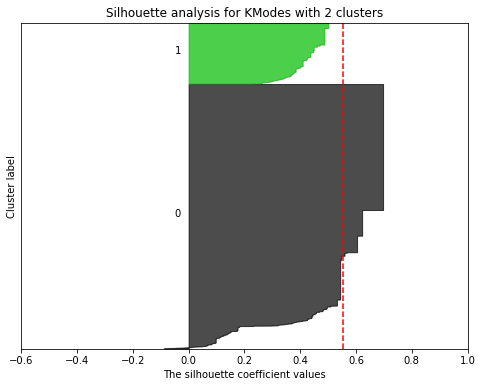

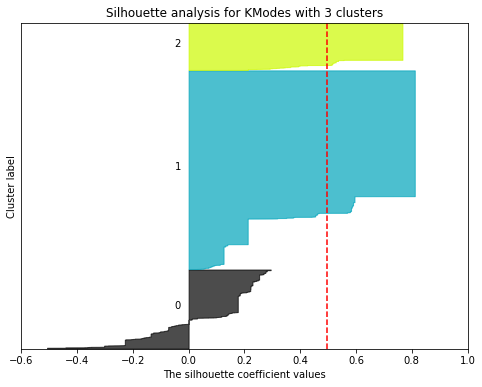

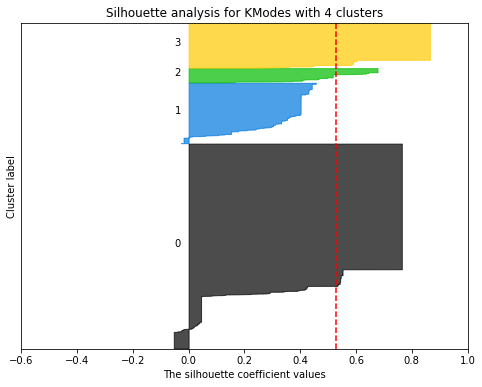

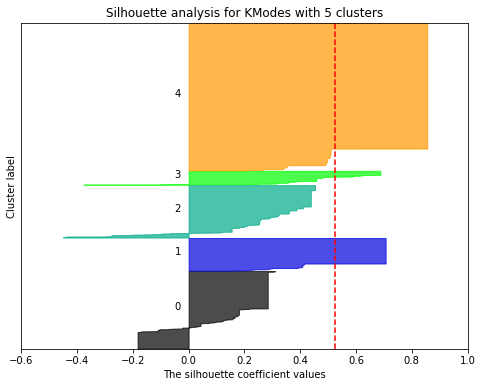

In [59]:
binary_data, kmodes_data = prep_kmodes(df_users)
for i in range(2,6):
    cluster_and_plot(binary_data, i)

[autoreload of homer_cluster failed: Traceback (most recent call last):
  File "/Users/stuartking/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/stuartking/galvanize/dsi/capstone/homer_segmentation/homer_silhouette.py", line 26
    print('For n_clusters = {} the average silhouette_score is: {}.'format(n_clusters, silhouette_avg)
                                                                         ^
SyntaxError: invalid syntax
]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/5, moves: 9, cost: 11176.0
Run 1, iteration: 2/5, moves: 0, cost: 11176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/5, moves: 0, cost: 9314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/5, moves: 421, cost: 11176.0
Run 3, iteration: 2/5, moves: 48, cost: 11176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/5, moves: 1884, cost: 9314.0
Run 4, iteration: 2/5, moves: 251, cost: 9314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/5, moves: 1079, cost: 9314.0
Run 5, iteration: 2/5, moves: 0, cost: 9314.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/5, moves: 1059, cost: 6896.0
Run 1, iteration: 2/

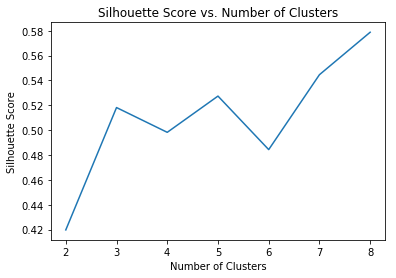

In [66]:
def get_silhouette_score(n_clusters):
    km = kmodes.KModes(n_clusters=n_clusters, init='Huang', n_init=5, max_iter=5, verbose=2)
    cluster_labels = km.fit_predict(kmodes_data)
    sil_avg = silhouette_score(binary_data, cluster_labels, metric='hamming')
    return sil_avg

sil_scores = [get_silhouette_score(i) for i in range(2,9)]
plt.plot(range(2,9), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')